# Fundamentals of Machine Learning Part 1

### NETID: yc2647

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Import the data. Make sure that lecture4data.csv is in the same folder as this file!
original_data = pd.read_csv('lecture4data.csv')

# Problem  1: Python Practice

In [3]:
problem_1_data = original_data.copy()

### a) Print out the first few rows of `problem_1_data`

In [4]:
print(problem_1_data.head())

                                  name        city state  adm_rate  \
0             Alabama A & M University      Normal    AL    0.6538   
1  University of Alabama at Birmingham  Birmingham    AL    0.6043   
2  University of Alabama in Huntsville  Huntsville    AL    0.8120   
3             Alabama State University  Montgomery    AL    0.4639   
4            The University of Alabama  Tuscaloosa    AL    0.5359   

   undergrads   cost  compl_4  median_hh_inc  median_earnings  
0        4505  20809   0.1104       49720.22            29900  
1       11269  22232   0.3173       55735.22            40200  
2        5829  20999   0.1848       58688.62            45600  
3        4740  18100   0.1216       46065.20            26700  
4       31005  27205   0.4135       57928.41            42700  


### b) Add a new column to `problem_1_data` called `education_profit_ratio` that holds each schools' `median_earnings` divided by its `cost`.

In [5]:
data= pd.DataFrame(problem_1_data)
mEs= data["median_earnings"]
cost= data["cost"]
eduProRatio= mEs/cost;
data.insert(9,"education_profit_ratio",eduProRatio,True)
#data.drop(['education_profit_ratio'], axis=1)
data

,name,city,state,adm_rate,undergrads,cost,compl_4,median_hh_inc,median_earnings,education_profit_ratio
0,Alabama A & M University,Normal,AL,0.6538,4505,20809,0.1104,49720.22,29900,1.436878
1,University of Alabama at Birmingham,Birmingham,AL,0.6043,11269,22232,0.3173,55735.22,40200,1.808204
2,University of Alabama in Huntsville,Huntsville,AL,0.8120,5829,20999,0.1848,58688.62,45600,2.171532
3,Alabama State University,Montgomery,AL,0.4639,4740,18100,0.1216,46065.20,26700,1.475138
4,The University of Alabama,Tuscaloosa,AL,0.5359,31005,27205,0.4135,57928.41,42700,1.569564
...,...,...,...,...,...,...,...,...,...,...
1579,DigiPen Institute of Technology,Redmond,WA,0.4657,989,41573,0.3139,70283.94,81300,1.955596
1580,National University College-Rio Grande,Rio Grande,PR,0.7866,1493,13739,0.0102,20548.96,17100,1.244632
1581,Neumont University,Salt Lake City,UT,0.8301,472,31821,0.5263,65341.88,47900,1.505295
1582,Johnson & Wales University-Charlotte,Charlotte,NC,0.7245,2218,42124,0.3932,68856.12,36600,0.868863


### c) (OPTIONAL) Briefly describe what `cost_single_brackets`, `cost_double_brackets`, and `multiple_columns` look like (what their shapes/dimensions are).

<b>Hint</b>: You can use Python's `type` function to tell the type of an objective. For example, `print(type(dylanIsCool))` will print out the type of `dylanIsCool`. You can also try printing out the object to see what it looks like.

In [6]:
multiple_columns = problem_1_data[['cost', 'median_earnings']]
cost_single_brackets = problem_1_data['cost']
cost_double_brackets = problem_1_data[['cost']]

# multiple_columns : only print out the keywords in the datasets
print(multiple_columns)
print(cost_single_brackets)
print(cost_double_brackets)

# single_bracket= Selecting one column - results in Pandas.Series
# double_bracket= Selecting subset of DataFrame - results in DataFrame
# double_bracket allows us to select multiple columns from the DataFrame, whereas single_bracket only allows us to select one. 

       cost  median_earnings
0     20809            29900
1     22232            40200
2     20999            45600
3     18100            26700
4     27205            42700
...     ...              ...
1579  41573            81300
1580  13739            17100
1581  31821            47900
1582  42124            36600
1583  27339            38800

[1584 rows x 2 columns]
0       20809
1       22232
2       20999
3       18100
4       27205
        ...  
1579    41573
1580    13739
1581    31821
1582    42124
1583    27339
Name: cost, Length: 1584, dtype: int64
       cost
0     20809
1     22232
2     20999
3     18100
4     27205
...     ...
1579  41573
1580  13739
1581  31821
1582  42124
1583  27339

[1584 rows x 1 columns]


# Basics of Machine Learning

So far we have discussed the importance of data visualization and data preprocessing. These steps are important in preparing the datasets. Now, we will start our machine learning section of the course. We have already discussed how a machine learning model is like a function, and we will now explain a bit more using __linear regression__ models. Before we begin, we should import some useful python.

This dataset contains information on different colleges across the US. The full dataset was assembled from https://collegescorecard.ed.gov/data/ and this version was trimmed down to a few important columns and cleaned to removed schools with missing data.

We will look at adm_rate (admission rate), undergrads (number of undergrads), cost (cost to attand the college for a year), compl_4 (percent of students graduated in 4 years), median_hh_inc (median household income of students), and median_earnings (median earnings 10 years after starting college).

We want to predict median_earnings using other columns in the data set. In other words, we have some inputs from the dataframe (such as cost), and we want to output another column in the dataframe (median_earnings).

# Section 1: Intro

To keep things clean throughout this Jupyter Notebook, in each section, we first make a copy of the original data. You won't have to do this in your own projects.

In [7]:
section_1_data = original_data.copy()
section_1_data.head()

,name,city,state,adm_rate,undergrads,cost,compl_4,median_hh_inc,median_earnings
0,Alabama A & M University,Normal,AL,0.6538,4505,20809,0.1104,49720.22,29900
1,University of Alabama at Birmingham,Birmingham,AL,0.6043,11269,22232,0.3173,55735.22,40200
2,University of Alabama in Huntsville,Huntsville,AL,0.8120,5829,20999,0.1848,58688.62,45600
3,Alabama State University,Montgomery,AL,0.4639,4740,18100,0.1216,46065.20,26700
4,The University of Alabama,Tuscaloosa,AL,0.5359,31005,27205,0.4135,57928.41,42700


Now, let's start machine learning! We'll choose a set of inputs, and then use machine learning to predict median_earnings using that set of inputs

In [8]:
inputs = section_1_data[['cost']]
outputs = section_1_data['median_earnings']

In [9]:
print(type(inputs))
inputs.head(5)

<class 'pandas.core.frame.DataFrame'>


,cost
0,20809
1,22232
2,20999
3,18100
4,27205


In [10]:
print(type(outputs))
outputs[:5]

<class 'pandas.core.series.Series'>


0    29900
1    40200
2    45600
3    26700
4    42700
Name: median_earnings, dtype: int64

In [11]:
ML_object_that_predicts = LinearRegression()

We called a function in sklearn called `LinearRegression` and stored the result in `ML_object_that_predicts`. `ML_object_that_predicts` is an object with several useful functions. You can access these functions through `ML_object_that_predicts.<insert function name here>`. As its name implies, we'll use these functions to make predictions.

To do this, we're use the `fit` function and `predict` functions. We'll go into what fitting is later. To predict, give `ML_object_that_predicts` a set of inputs, and it'll spit out a set of predictions based on those inputs.

In [12]:
known_input, future_input, known_output, future_output = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

ML_object_that_predicts.fit(known_input, known_output) # tell it known stuff

predictions = ML_object_that_predicts.predict(future_input) # given future input, predict future output!

# compare actual median_earnings and the predicted median_earnings
pd.DataFrame({"REAL median_income":future_output, "PREDICTED median_income":predictions}).reset_index(drop=True).head(10)

,REAL median_income,PREDICTED median_income
0,36200,35659.150942
1,42700,44239.451395
2,42500,37177.409277
3,42800,42462.534625
4,35200,45324.623556
5,45800,41478.088340
6,49200,48904.428228
7,31100,44439.499303
8,43900,36473.381025
9,21400,42818.760286


Now we'll call the `score` function of `ML_object_that_predicts`. This returns a "score", which is a measure of how accurate the predictions are. The best score is 1, and negative scores are really bad.

In [13]:
print("Score:", ML_object_that_predicts.score(future_input, future_output))

Score: 0.17036266107284015


Let's quickly visualize what we just did. The blue points are the true values, and the black points (which are close together, so they look like a line) are our predictions. Our predictions aren't super accurate, but they're somewhat close for most points.

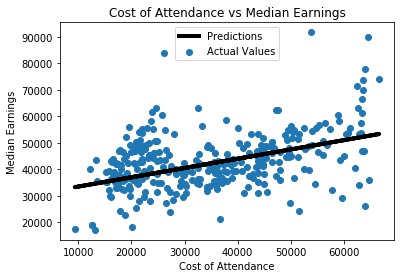

In [14]:
plt.scatter(future_input, future_output)
plt.plot(future_input, predictions, 'k', linewidth=4)
plt.legend(["Predictions","Actual Values"])
plt.title('Cost of Attendance vs Median Earnings')
plt.xlabel('Cost of Attendance')
plt.ylabel('Median Earnings')
plt.show()

### Summary:

sklearn has an object called `ML_object_that_predicts`. We "fit" it on some inputs and outputs. Then, we give `ML_object_that_predicts` some more inputs, and it predicts outputs.

### What we don't know:

What's "fitting"?

Why do we split the dataset up?

How does the model make predictions?

How do we increase the model's score (how do we make our model better)?

# Section 2: Fitting / Training

In [15]:
section_2_data = original_data.copy()

The inputs are called "features", and the output is called the "target".

`ML_object_that_predicts` is a "model"

In [16]:
features = section_2_data[['cost']]
target = section_2_data['median_earnings']
model = LinearRegression()

In reality, we will train a model on known data, and that model is our product -- we're done with it, and we ship it out to be used. The user will give it new data, and the model will predict the corresponding outputs.
We emulate that by splitting our data into "known" data and "new" data. There're a lot of synonyms for known data and new data, and we'll introduce a couple today.

In [17]:
from sklearn.model_selection import train_test_split
known_data, new_data, known_output, goal_output = train_test_split(features, target, test_size=0.2, random_state=42)

# Here, we call the values we are trying to predict the "goal_output".
# Our goal is to make a model that, when given known_output, can try to predict goal_output.

model.fit(known_data, known_output) # train/fit on known inputs
predictions = model.predict(new_data) # predict on new data

print("Score:", model.score(new_data, goal_output))

Score: 0.17036266107284015


### Summary
`LinearRegression()` returns a "model", which is an object that we first train, then use to predict values. To train, we call `model.fit` with known features and their corresponding outputs. To predict, we call `model.predict` on some new set of data, which it wasn't trained on

### What we still don't know

How does the model make predictions?

How do we increase the model's score (how do we make our model better)?

# Section 3: Models

In [18]:
section_3_data = original_data.copy()

In [19]:
features = section_3_data[['cost','adm_rate']]
target = section_3_data['median_earnings']
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)  #train the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Running the following cell will pull up a description of `model`.

In [20]:
# if the popup annoys you, then feel free to comment out the following line
# model?

In [21]:
model.coef_

array([ 3.14511519e-01, -8.76543392e+03])

In [22]:
model.intercept_

37049.972009516816

`model` is a linear regression model of the form $y = B_1*x_1 + B_2*x_2 + k$, where:

$y = $ median_earnings, our target

$x_1 = $ cost

$B_1 = 3.14511519e-01$, the coefficient on cost

$x_2 = $ admission rate

$B_2 = -8.76543392e+03$, the coefficient on admission rate

$k = 37049.972$, the intercept. 

We won't talk too much about the intercept in this class, but if you're interested in learning more, feel free to ask us after class.

Say you have information about a school's cost and admission rate. Then, `model` can use the school's cost and admission rate to predict the school's median earnings. How does it do that? It calculates $predicted\_median\_earnings = B_1*cost + B_2 * x_2$

Let's try this out on an example.

In [23]:
section_3_data.loc[1:1]

,name,city,state,adm_rate,undergrads,cost,compl_4,median_hh_inc,median_earnings
1,University of Alabama at Birmingham,Birmingham,AL,0.6043,11269,22232,0.3173,55735.22,40200


In [24]:
example_cost = 22232
example_admission_rate = 0.6043

In [25]:
B1 = model.coef_[0]
B2 = model.coef_[1]
k = model.intercept_
manually_predicted_median_earnings = B1 * example_cost + B2 * example_admission_rate + k
print(manually_predicted_median_earnings)

38745.240382799544


In [26]:
model.predict([[example_cost,example_admission_rate]])[0]

38745.240382799544

The two results were the same. From this, we can conclude that `model.predict` is really just outputting $B_1*x_1 + B_2*x_2 + k$.

(When we look at other algorithms in later lectures, the equation will be different. However, the general idea is the same: `model.fit` created an equation, and `model.predict` uses that equation)

### Summary
Our `model` is an object. When we train it (by calling `model.fit`), we're setting its parameters (for example, $B_1$, $B_2$, and k). When we predict (by calling `model.predict(new_data)`), `model` is applying a function to each row of `new_data` in order to get a prediction.


### What we still don't know

How do we increase the model's score (how do we make our model better)?

## Problem 2

Use 'cost' and 'compl_4' to predict 'median_earnings'.

Use a train test split of 25% as a test set (not 20%, which all the previous examples used).

Print out the median_earnings predicted for the test set. Also print out the model's score.

In [27]:
problem_2_data = original_data.copy()

In [28]:
# Fill in this cell with your code. We've provided helpful psuedocode.

features = problem_2_data[['cost','compl_4']]
target = problem_2_data['median_earnings']
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)  # train the model

model.coef_
model.intercept_

print(model.coef_)
print(model.intercept_)



[1.38537264e-01 1.97134008e+04]
29644.247440676674


In [29]:
problem_2_data.loc[1:1]

,name,city,state,adm_rate,undergrads,cost,compl_4,median_hh_inc,median_earnings
1,University of Alabama at Birmingham,Birmingham,AL,0.6043,11269,22232,0.3173,55735.22,40200


In [30]:
example_cost= 22232
example_compl_4= 0.3173

In [31]:
B1= model.coef_[0]
B2= model.coef_[1]
k= model.intercept_

manually_predict_median_earnings= B1*example_cost + B2*example_compl_4 + k
print(manually_predict_median_earnings)

38979.26998106415


In [32]:
model_predict= model.predict([[example_cost,example_compl_4]])[0] # predict on new data

print(model_predict)
print("Score:", model.score(x_train, y_train))

#? why the score is so low?

38979.26998106415
Score: 0.2652107066553435


# Section 4: Validation and Testing

In [33]:
section_4_data = original_data.copy()

In [34]:
X = section_4_data.drop(["name","median_earnings"], axis=1) # use all columns except name and median_earnings
X = pd.get_dummies(X) # transform categorical columns so we can use them in linear regression
Y = section_4_data["median_earnings"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train) # train on train set

print("training score:", model.score(x_train,y_train)) # how accurately did model capture training set relationship?
print("validation score:", model.score(x_test,y_test)) # how well can model predict new things?

training score: 0.769963851281587
validation score: 0.15056033082221265


## Problem 3

### Replace the 'None' values below with appropriate values to create a train-validate-test split.

In [35]:
problem_3_data = original_data.copy()
X = problem_3_data["cost"] # TODO
X = pd.get_dummies(X)   # remember to transform categorical columns so we can use them in linear regression
print(X)
Y = problem_3_data["median_earnings"]

#x_not_test, x_test, y_not_test, y_test = None,None,None,None # TODO
#x_train, x_valid, y_train, y_valid = None,None,None,None # TODO

x_not_test, x_test, y_not_test, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, train_size=0.25, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train) # TODO

print("training score:", model.score(x_train,y_train))
print("validation score:", model.score(x_valid,y_valid))

#?

      6424   6748   9103   9191   9348   10521  10754  10776  10826  10851  \
0         0      0      0      0      0      0      0      0      0      0   
1         0      0      0      0      0      0      0      0      0      0   
2         0      0      0      0      0      0      0      0      0      0   
3         0      0      0      0      0      0      0      0      0      0   
4         0      0      0      0      0      0      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1579      0      0      0      0      0      0      0      0      0      0   
1580      0      0      0      0      0      0      0      0      0      0   
1581      0      0      0      0      0      0      0      0      0      0   
1582      0      0      0      0      0      0      0      0      0      0   
1583      0      0      0      0      0      0      0      0      0      0   

      ...  65133  65405  65436  65657  65887  66078  66323  666

In [36]:
print("testing score:", model.score(x_test,y_test))

testing score: -1.892344721499959e+25


## Problem 4

Use 'median_earnings' to predict 'median_earnings'.

Remember to create a train-test split (use whatever percentage of test set you want).

Print out the coefficients. Print out the model's score. Briefly explain why you got the coefficients and accuracy that you got.

In [37]:
problem_4_data = original_data.copy()

In [38]:
# split data and create model
X = problem_4_data["median_earnings"] 
X = pd.get_dummies(X) # transform categorical columns so we can use them in linear regression
Y = problem_4_data["median_earnings"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


model = LinearRegression()
model.fit(x_train, y_train) # train on train set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
# print out coefficient 
print(model.coef_)

# print out the score
print("training score:", model.score(x_train,y_train)) # how accurately did model capture training set relationship?
print("validation score:", model.score(x_test,y_test)) # how well can model predict new things?

#? how do the "test_size" affect validation score

[-1.80852900e+03 -3.33357692e+04 -3.09357692e+04 -2.92357692e+04
 -2.90357692e+04 -2.87357692e+04 -4.94224402e+02 -2.75357692e+04
 -2.74357692e+04 -2.73357692e+04  1.26971121e+03 -2.70357692e+04
 -2.69357692e+04 -2.68357692e+04 -2.55357692e+04 -2.48357692e+04
 -2.47357692e+04 -2.43357692e+04 -2.42357692e+04 -2.83670837e+03
 -2.32357692e+04 -2.28357692e+04 -2.27357692e+04 -2.25357692e+04
 -2.22357692e+04 -2.20357692e+04 -2.18357692e+04 -1.18122871e+03
 -2.14357692e+04 -2.13357692e+04 -2.12357692e+04 -2.10357692e+04
 -2.07357692e+04 -2.03357692e+04 -2.02357692e+04 -2.01357692e+04
 -2.00357692e+04 -1.98357692e+04 -1.95357692e+04 -1.94357692e+04
 -1.93357692e+04 -1.92357692e+04 -1.91357692e+04 -1.90357692e+04
 -1.89357692e+04 -1.88357692e+04 -1.87357692e+04 -1.84357692e+04
 -1.83357692e+04 -1.81357692e+04 -1.80357692e+04 -1.79357692e+04
 -1.78357692e+04 -1.77357692e+04 -1.76357692e+04 -1.75357692e+04
 -1.74357692e+04 -1.72357692e+04 -1.70357692e+04 -1.69357692e+04
 -1.68357692e+04 -1.67357

#### Briefly explain why you got the coefficients and score that you got. 

Since the model we train and the value we expect to get is the same, the coefficient will be the same as median_earnings and we get a 1.0 score.

## Problem 5 (optional)

Linear regression does well with variables that are correlated. Look up how to print out the correlation matrix of a pandas dataframe.

Looking at the correlation matrix, pick at least 3 features that have a low (between -0.5 and 0.5) correlation with median_earnings and plot scatterplots of each of them against median_earnings.
Using these scatterplot, pick one of the features and try a few transformations that might increase its correlation with median_earnings. That is, create new features (columns) and see what their correlation with median_earnings is.

Create a model using one of these new features, as well as other features that are well correlated with median_earnings, as features. Print out the score.

In [40]:
problem_5_data = original_data.copy()

In [41]:
# print out correlation matrix
data= pd.DataFrame(problem_5_data)
correlationMatrix= data.corr()   #data.corr()
print(correlationMatrix)

                 adm_rate  undergrads      cost   compl_4  median_hh_inc  \
adm_rate         1.000000   -0.062271 -0.293172 -0.321177      -0.196725   
undergrads      -0.062271    1.000000 -0.276129 -0.019260       0.100142   
cost            -0.293172   -0.276129  1.000000  0.697559       0.573066   
compl_4         -0.321177   -0.019260  0.697559  1.000000       0.563205   
median_hh_inc   -0.196725    0.100142  0.573066  0.563205       1.000000   
median_earnings -0.269183    0.211267  0.435045  0.503592       0.607307   

                 median_earnings  
adm_rate               -0.269183  
undergrads              0.211267  
cost                    0.435045  
compl_4                 0.503592  
median_hh_inc           0.607307  
median_earnings         1.000000  


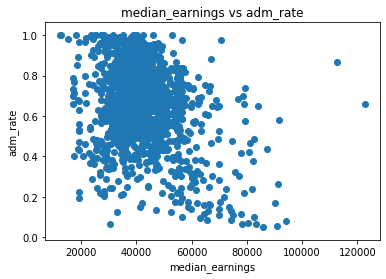

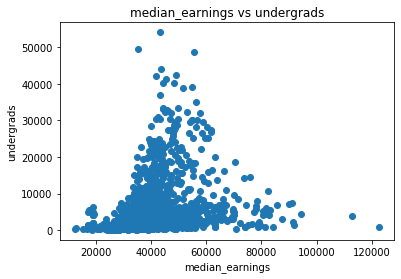

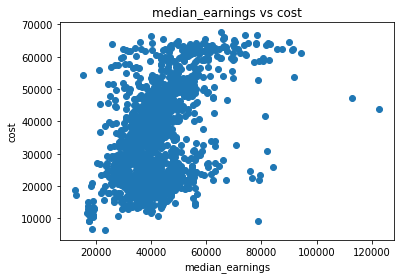

In [42]:
# use matplotlib to plot
import matplotlib.pyplot as plt
%matplotlib inline  

#Load data
# make scatter plots, 1)adm_rate, 2)undergrads, 3)cost
# Extracting adm_rate and undergrads and cost
X = pd.DataFrame(data,columns=['adm_rate','undergrads','cost','median_earnings']) #Name rows according to sklearn API

# plot median_earnings vs adm_rate
plt.scatter(X['median_earnings'],X['adm_rate']) 
plt.title('median_earnings vs adm_rate')
plt.xlabel('median_earnings')
plt.ylabel('adm_rate')
plt.show()

# plot median_earnings vs undergrads
plt.scatter(X['median_earnings'],X['undergrads']) 
plt.title('median_earnings vs undergrads')
plt.xlabel('median_earnings')
plt.ylabel('undergrads')
plt.show()

# plot median_earnings vs cost
plt.scatter(X['median_earnings'],X['cost']) 
plt.title('median_earnings vs cost')
plt.xlabel('median_earnings')
plt.ylabel('cost')
plt.show()


In [43]:
#? create new features (columns) and see what their correlation with median_earnings is.
# pick "undergrads"
correlationMatrix= data.corr()
data.insert(9,"undergrad_corr",eduProRatio,True)
data

,name,city,state,adm_rate,undergrads,cost,compl_4,median_hh_inc,median_earnings,undergrad_corr
0,Alabama A & M University,Normal,AL,0.6538,4505,20809,0.1104,49720.22,29900,1.436878
1,University of Alabama at Birmingham,Birmingham,AL,0.6043,11269,22232,0.3173,55735.22,40200,1.808204
2,University of Alabama in Huntsville,Huntsville,AL,0.8120,5829,20999,0.1848,58688.62,45600,2.171532
3,Alabama State University,Montgomery,AL,0.4639,4740,18100,0.1216,46065.20,26700,1.475138
4,The University of Alabama,Tuscaloosa,AL,0.5359,31005,27205,0.4135,57928.41,42700,1.569564
...,...,...,...,...,...,...,...,...,...,...
1579,DigiPen Institute of Technology,Redmond,WA,0.4657,989,41573,0.3139,70283.94,81300,1.955596
1580,National University College-Rio Grande,Rio Grande,PR,0.7866,1493,13739,0.0102,20548.96,17100,1.244632
1581,Neumont University,Salt Lake City,UT,0.8301,472,31821,0.5263,65341.88,47900,1.505295
1582,Johnson & Wales University-Charlotte,Charlotte,NC,0.7245,2218,42124,0.3932,68856.12,36600,0.868863


In [44]:
features = problem_5_data[['cost','undergrad_corr','adm_rate']]
target = problem_5_data['median_earnings']
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)  # train the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
# predict and print out the median earnings for the test set
model.coef_
model.intercept_
B1 = model.coef_[0]
B2 = model.coef_[1]
B3 = model.coef_[2]

problem_5_data.loc[1:1]


,name,city,state,adm_rate,undergrads,cost,compl_4,median_hh_inc,median_earnings,undergrad_corr
1,University of Alabama at Birmingham,Birmingham,AL,0.6043,11269,22232,0.3173,55735.22,40200,1.808204


In [46]:
k = model.intercept_
manually_predicted_median_earnings = B1 * example_cost + B2 * example_admission_rate + k

# print out the score
print(manually_predicted_median_earnings)

16461.455606859243


In [47]:
example_cost= 22232
example_undergrad_corr= 1.808204
example_adm_rate= 0.6043


In [48]:
B1= model.coef_[0]
B2= model.coef_[1]
B3= model.coef_[2]
k= model.intercept_
manually_predict_median_earnings= B1*example_cost + B2*example_undergrad_corr + B3*example_adm_rate +k
print(manually_predict_median_earnings)

38334.61956426474


In [49]:
model_predict= model.predict([[example_cost,example_undergrad_corr,example_adm_rate ]])[0] # predict on new data

print(model_predict)
print("Score:", model.score(x_train, y_train))

38334.61956426474
Score: 0.7155141979620887
